___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
from datetime import datetime
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [3]:
df.duplicated().value_counts()

False    17414
dtype: int64

False    17414
dtype: int64

In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

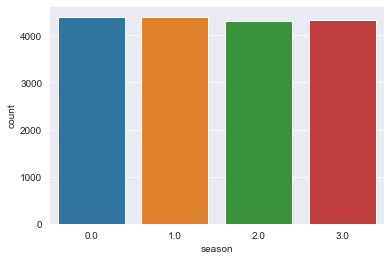

In [5]:
sns.countplot(data= df, x = 'season');


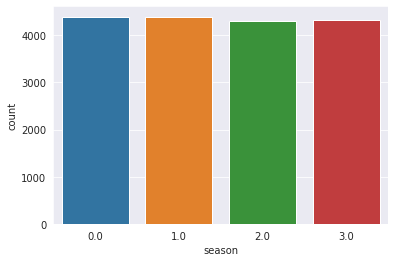

In [ ]:
# season



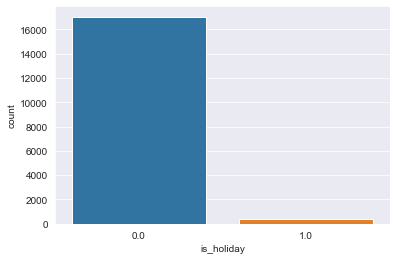

In [6]:
sns.countplot(data= df, x = 'is_holiday');

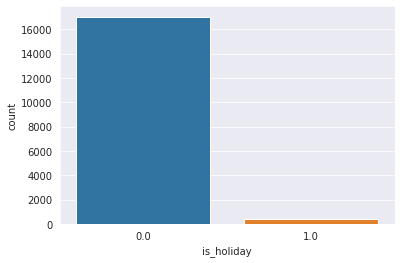

In [ ]:
# is_holiday


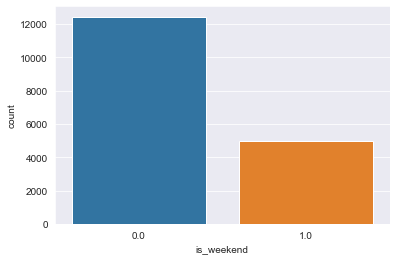

In [7]:
sns.countplot(data= df, x = 'is_weekend');

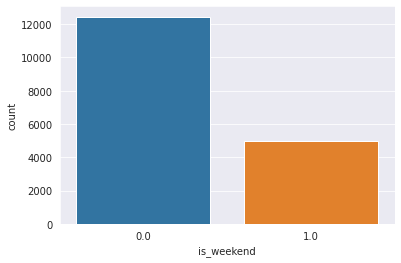

In [ ]:
# is_weekend


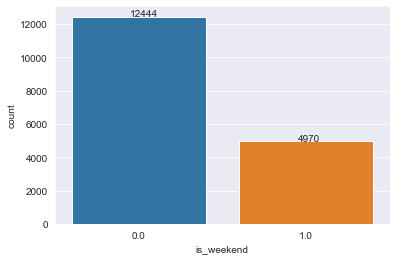

In [136]:
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

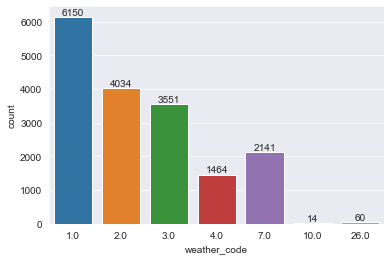

In [145]:
sns.countplot(data = df, x = "weather_code");
code = df.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

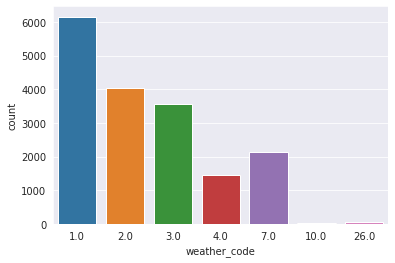

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [9]:
df1 = df.copy()
df1.set_index('timestamp', inplace = True)
df1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [10]:
type(df1.index)


pandas.core.indexes.base.Index

In [11]:
df1.index = pd.to_datetime(df1.index)

In [14]:
df1["year_month"] = df1.index.strftime("%Y-%m")
df1['year'] = df1.index.year 
df1['month'] = df1.index.month 
df1['day_of_month'] = df1.index.day 
df1['day_of_week'] = df1.index.dayofweek
df1['hour'] = df1.index.hour
df1.head()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

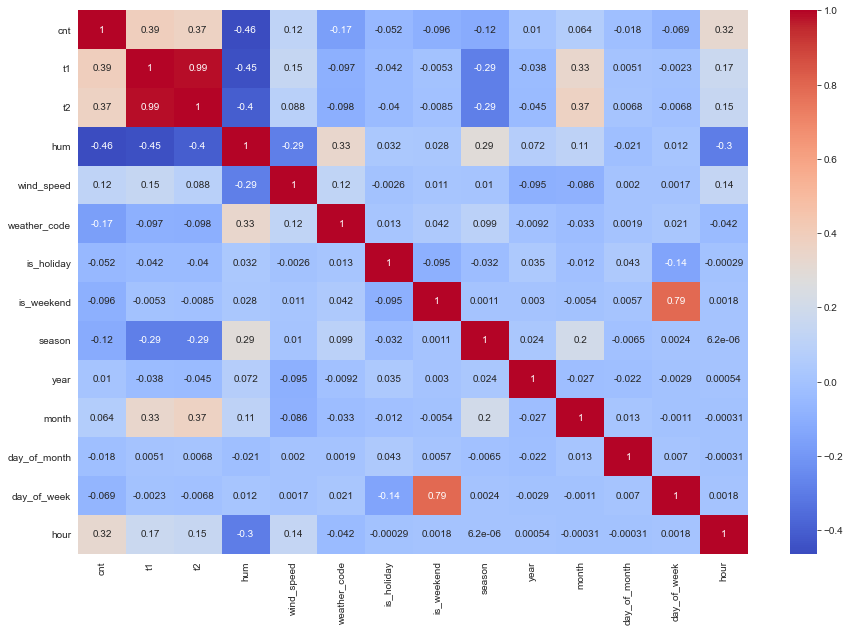

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()


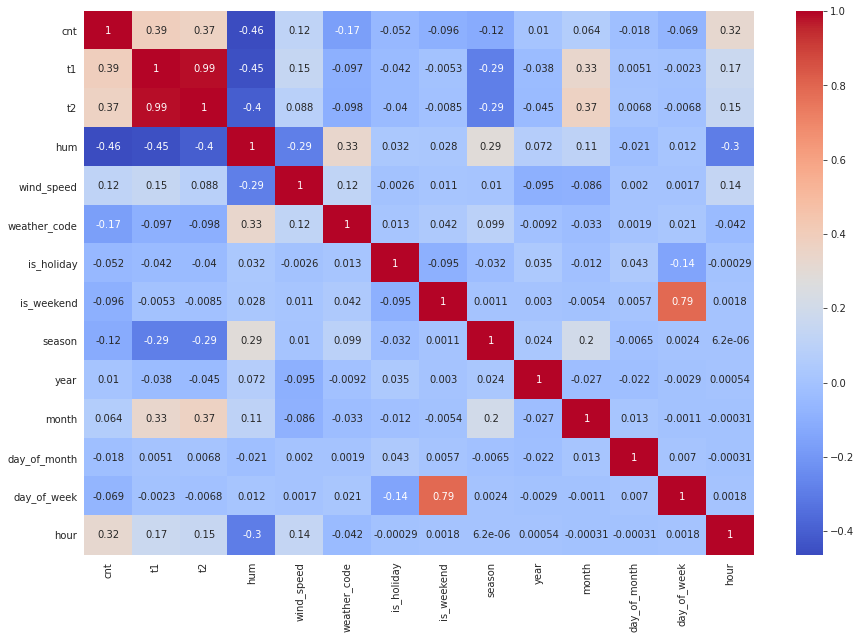

In [ ]:
# for all variables 


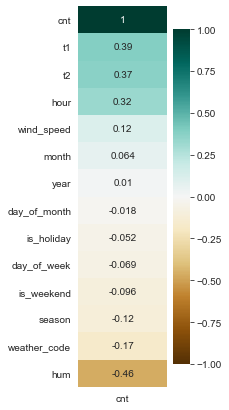

In [16]:
plt.figure(figsize = (2, 7))
sns.heatmap(df1.corr()[['cnt']].sort_values(by='cnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()


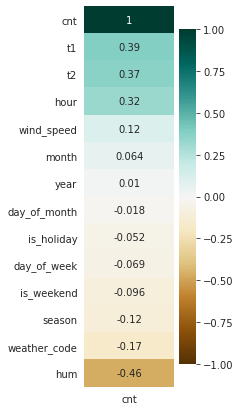

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [17]:
df1.corr().index

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'year', 'month', 'day_of_month', 'day_of_week',
       'hour'],
      dtype='object')

In [18]:
df_cnt_corr = df1.corr()['cnt'].sort_values(ascending=True)
df_cnt_corr

hum            -0.462901
weather_code   -0.166633
season         -0.116180
is_weekend     -0.096499
day_of_week    -0.068688
is_holiday     -0.051698
day_of_month   -0.017887
year            0.010046
month           0.063757
wind_speed      0.116295
hour            0.324423
t2              0.369035
t1              0.388798
cnt             1.000000
Name: cnt, dtype: float64

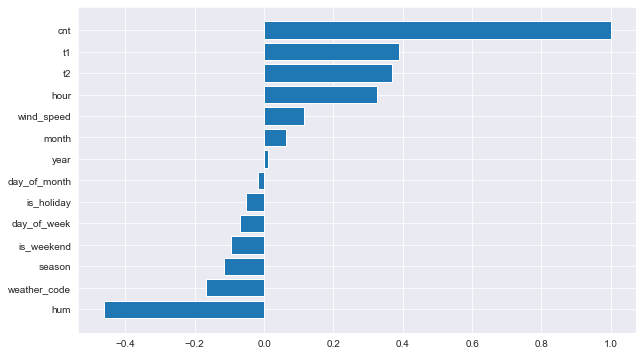

In [19]:
plt.figure(figsize = (10,6))
plt.barh(df_cnt_corr.index, df_cnt_corr)
plt.show()


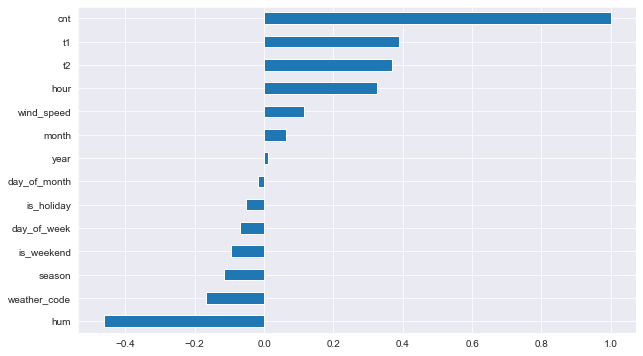

In [20]:
plt.figure(figsize = (10,6))
df_cnt_corr.plot(kind = "barh")
plt.show()


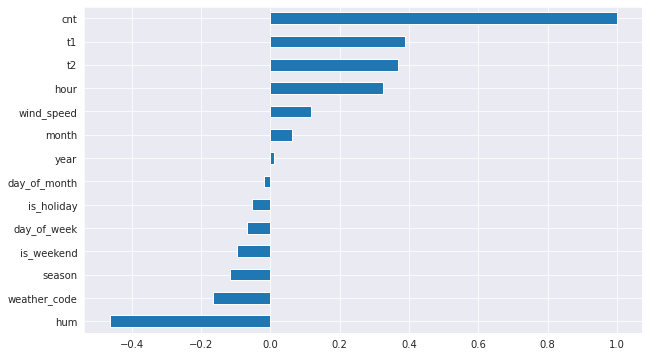

In [ ]:
#with pandas


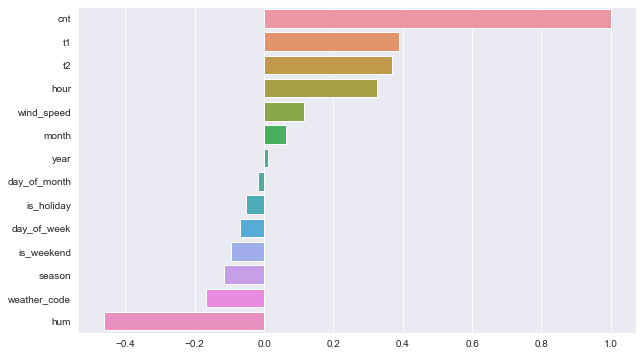

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x = df1.corr().cnt.sort_values(ascending=False).values, y=df1.corr().cnt.sort_values(ascending=False).index);


### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

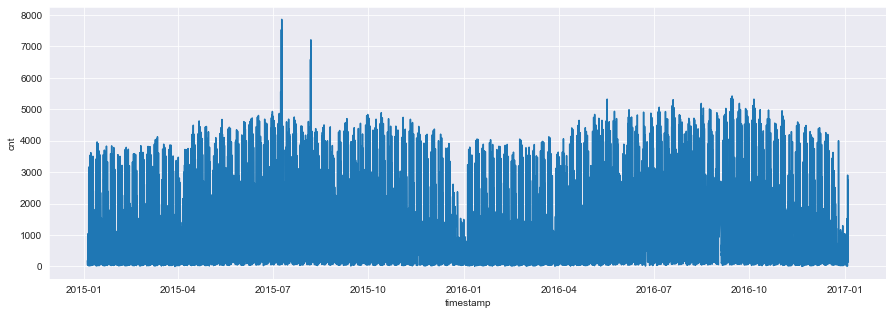

In [22]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = df1.index, y = 'cnt', data = df1)

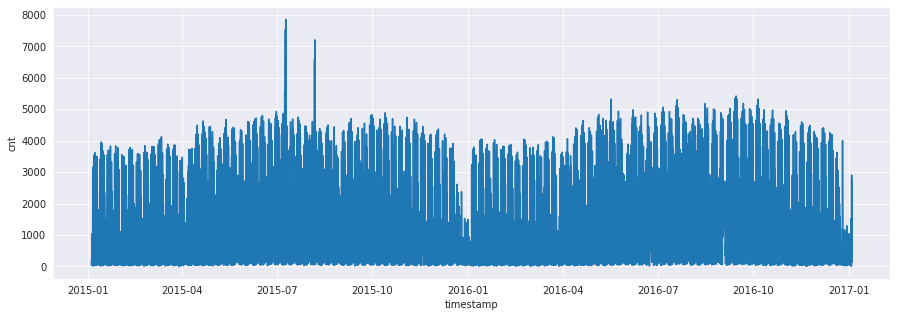

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [23]:
df_sum = pd.DataFrame(df1.groupby('year_month').cnt.sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


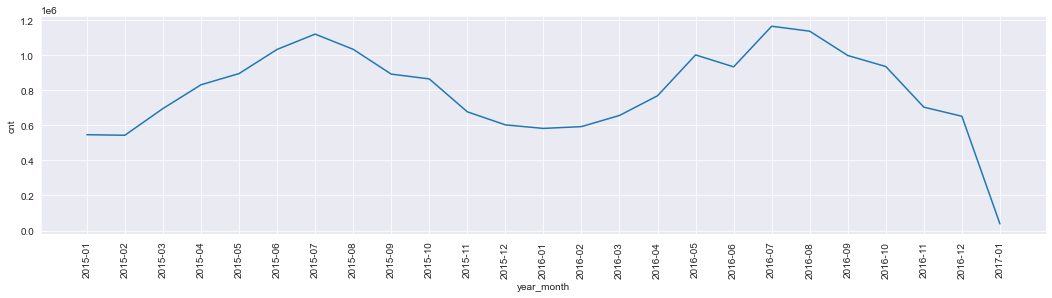

In [24]:
plt.figure(figsize = (18, 4))
sns.lineplot(x = df_sum.index, y = 'cnt', data = df_sum)
plt.xticks(rotation = 90)
plt.show()


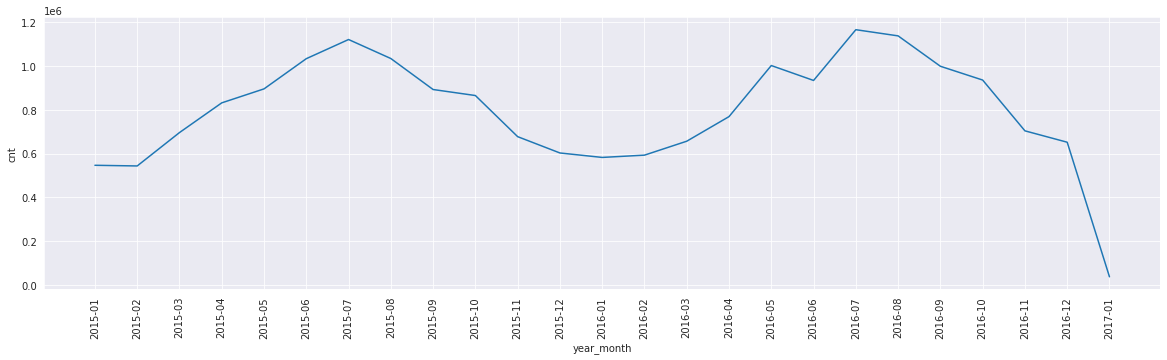

In [ ]:
# with lineplot


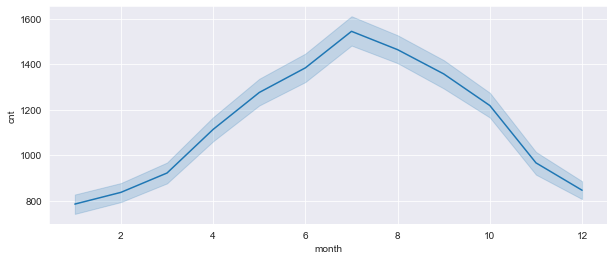

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot(data = df1, x = 'month', y = 'cnt');


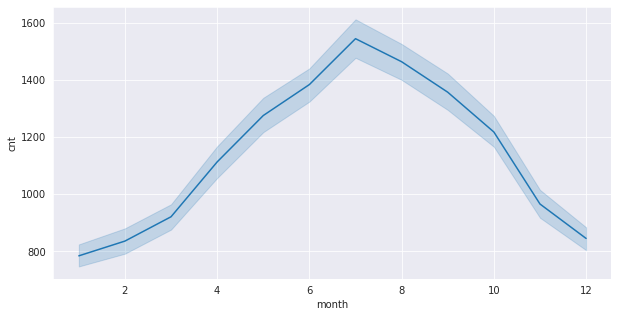

In [ ]:
# with lineplot


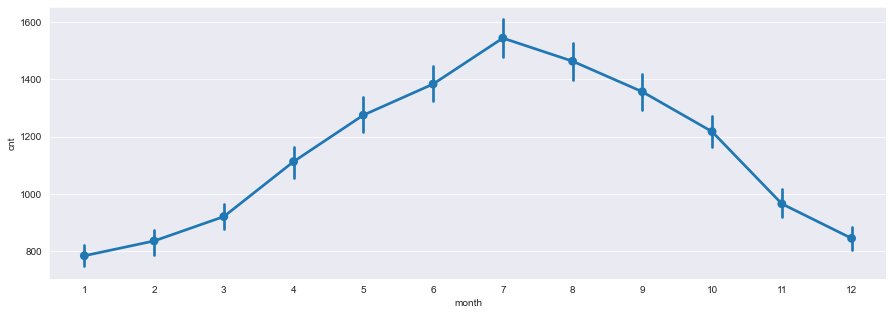

In [26]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(data=df1,x="month",y="cnt")
plt.show()

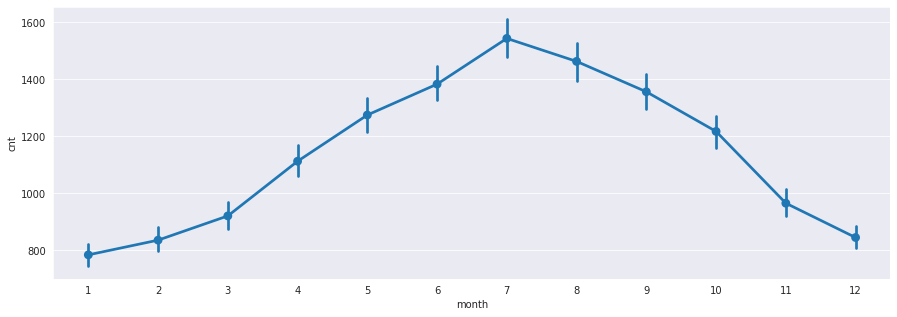

In [ ]:
# with pointplot


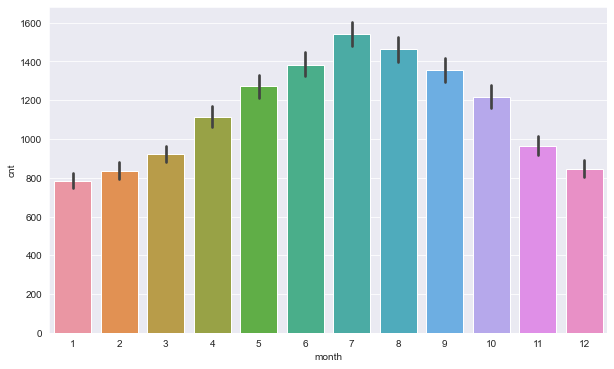

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1,x="month",y="cnt")
plt.show()

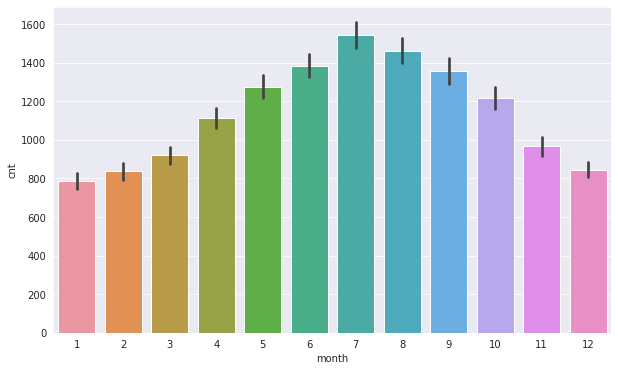

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

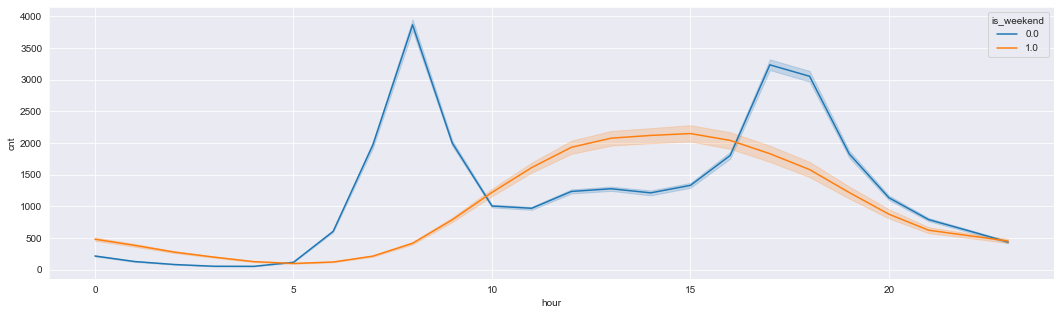

In [29]:
plt.figure(figsize=(18,5))
sns.lineplot(data = df1, x = 'hour', y = 'cnt', hue = 'is_weekend');

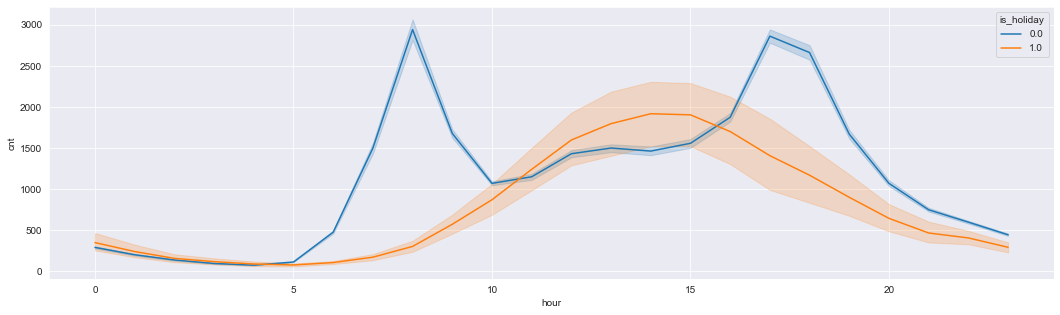

In [30]:
plt.figure(figsize=(18,5))
sns.lineplot(data = df1, x = 'hour', y = 'cnt', hue = 'is_holiday');

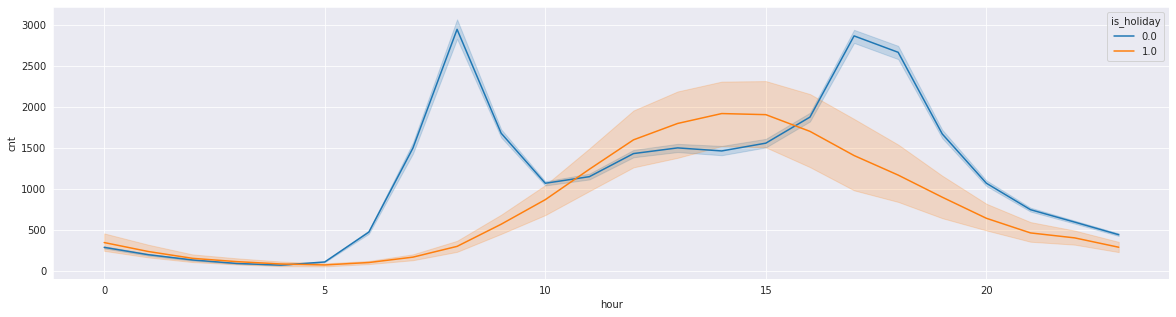

In [ ]:
# with lineplot (*whether it is a holiday or not*)


<AxesSubplot:xlabel='hour', ylabel='cnt'>

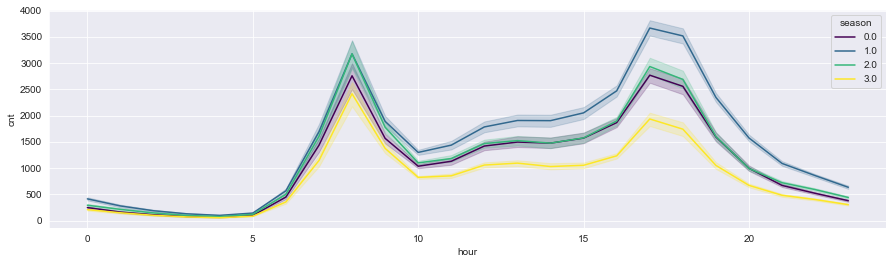

In [31]:
plt.figure(figsize=(15,4))
sns.lineplot(data = df1, x = 'hour', y = 'cnt', hue = 'season', palette = 'viridis')

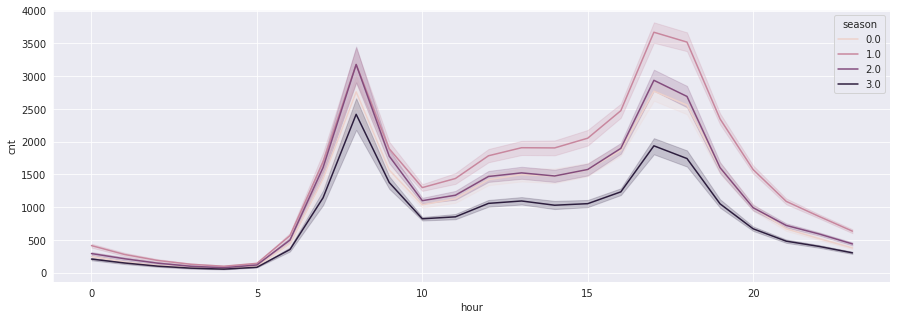

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


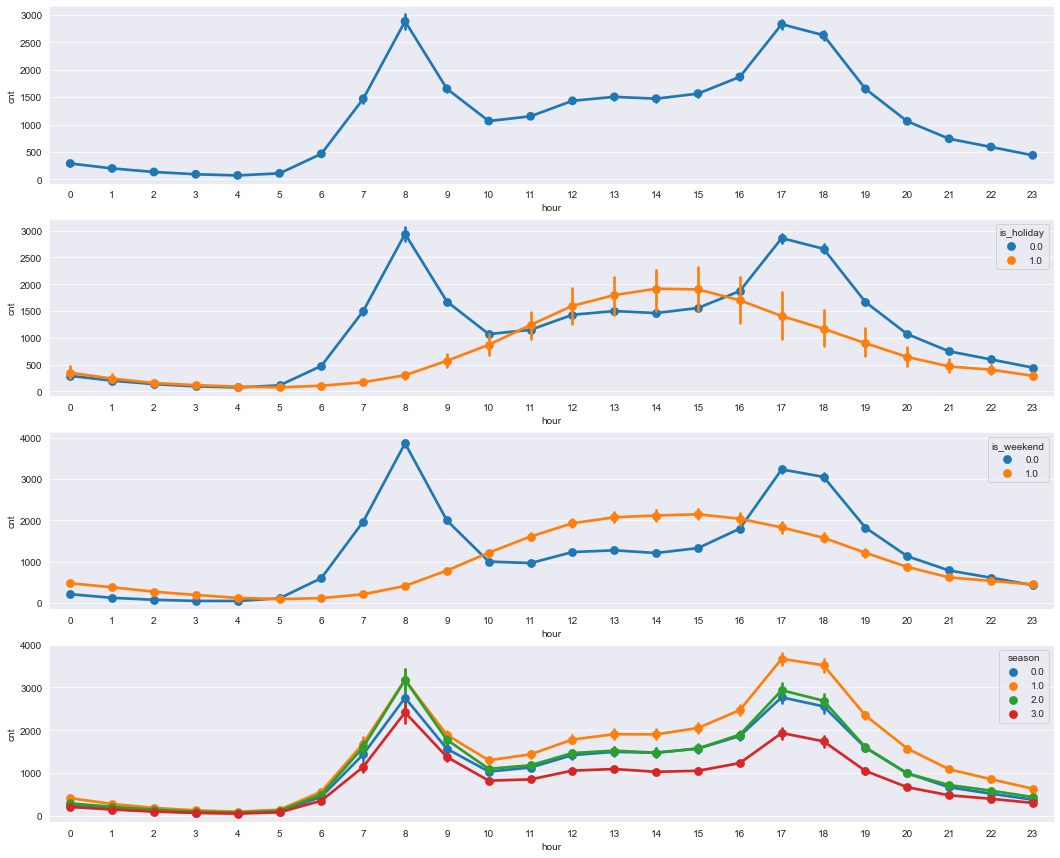

In [32]:
fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize = (18, 15))
sns.pointplot(data = df1, x = 'hour', y = 'cnt', ax = ax[0])
sns.pointplot(data = df1, x = 'hour', y = 'cnt', hue = 'is_holiday', ax = ax[1])
sns.pointplot(data = df1, x = 'hour', y = 'cnt', hue = 'is_weekend', ax = ax[2])
sns.pointplot(data = df1, x = 'hour', y = 'cnt', hue = 'season', ax = ax[3])
plt.show()


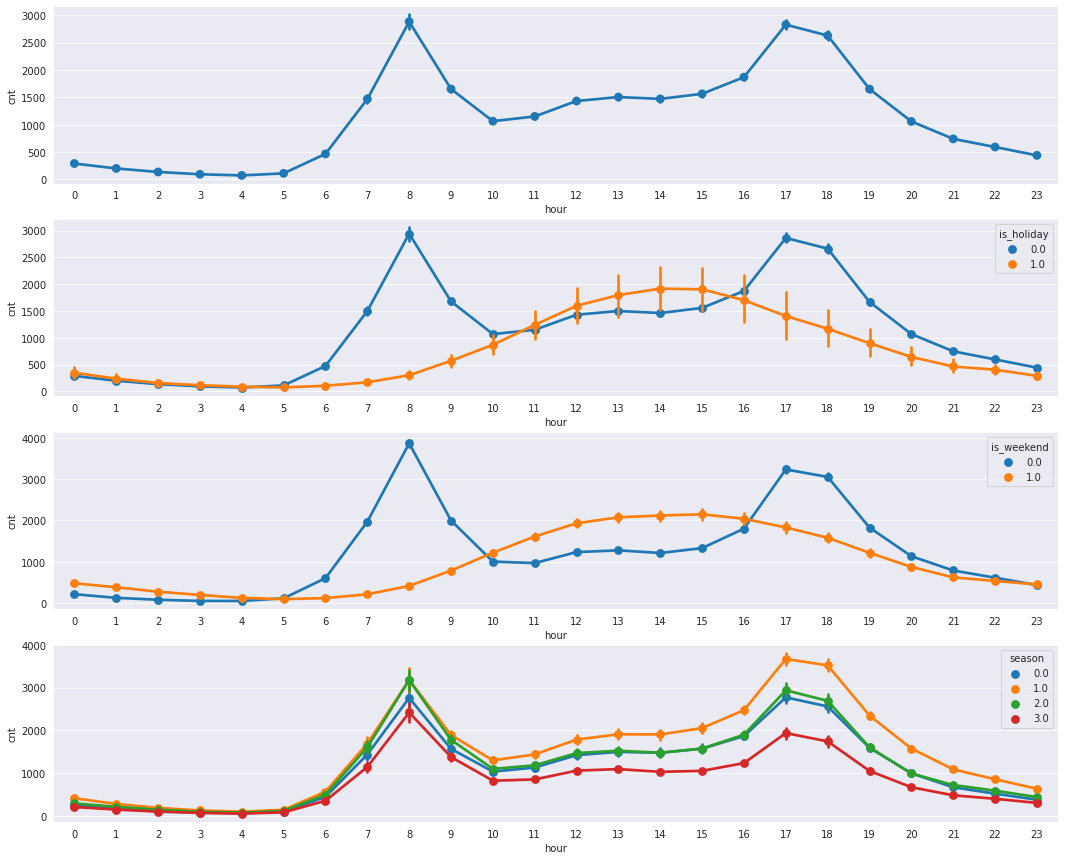

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

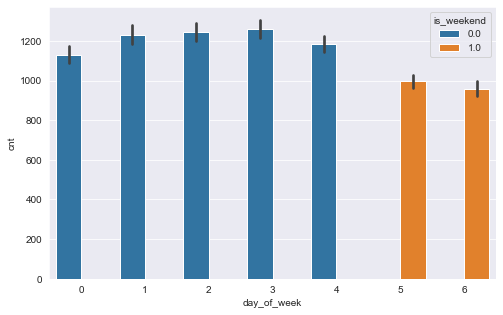

In [33]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'day_of_week', y = 'cnt', hue = 'is_weekend', data = df1)

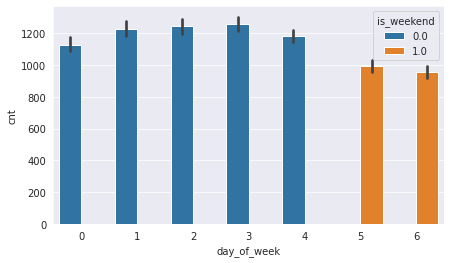

In [ ]:
# with barplot


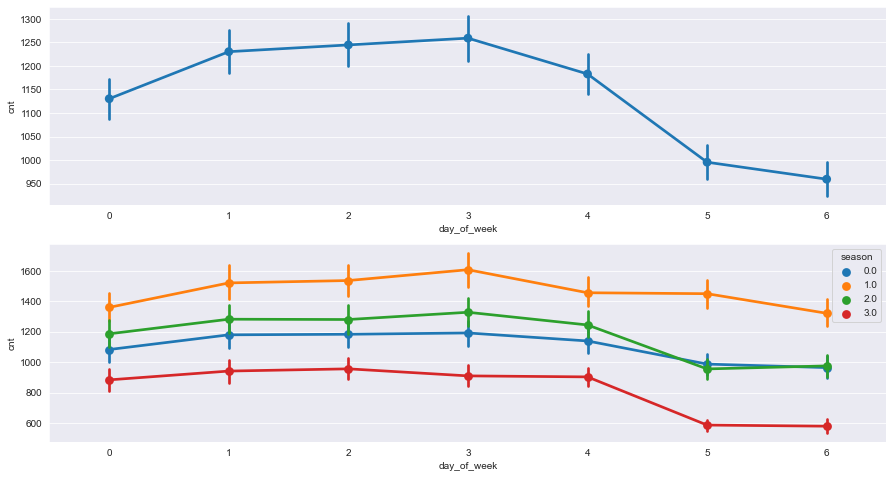

In [34]:
fig, ax = plt.subplots(2, 1, figsize = (15,8))

sns.pointplot(data = df1, x = 'day_of_week', y = 'cnt', ax = ax[0])
sns.pointplot(data = df1, x = 'day_of_week', y = 'cnt', hue = 'season', ax = ax[1])

plt.show()

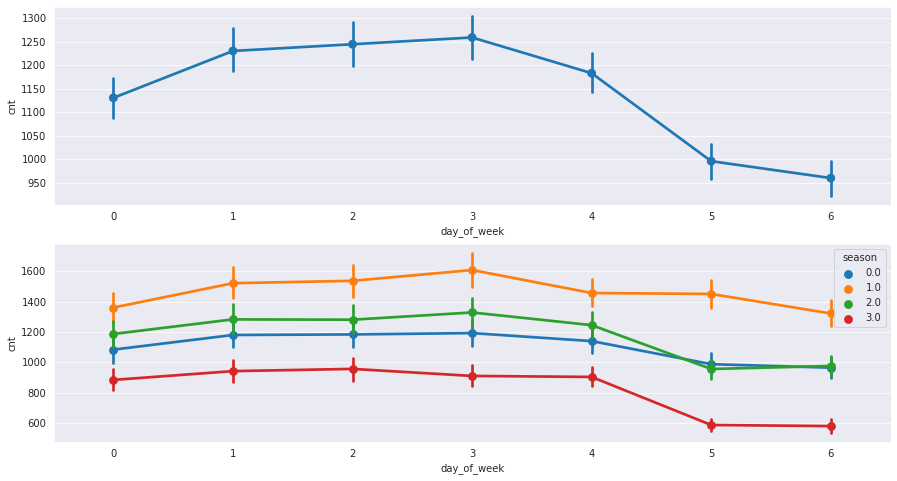

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

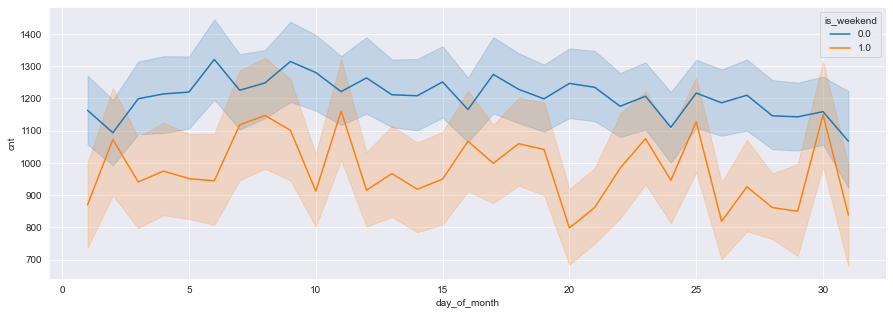

In [35]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'day_of_month', y = 'cnt', hue = 'is_weekend', data = df1)
plt.show()

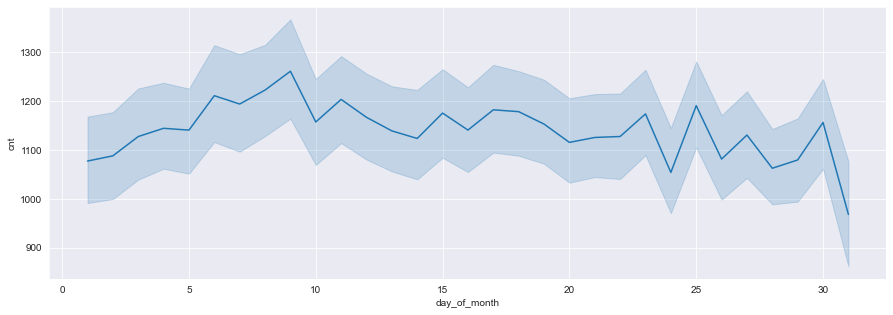

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


In [36]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'day_of_month', y = 'cnt', data = df1)
plt.show()

pd.DataFrame(df1.groupby('day_of_month').cnt.mean().astype('int')).T

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


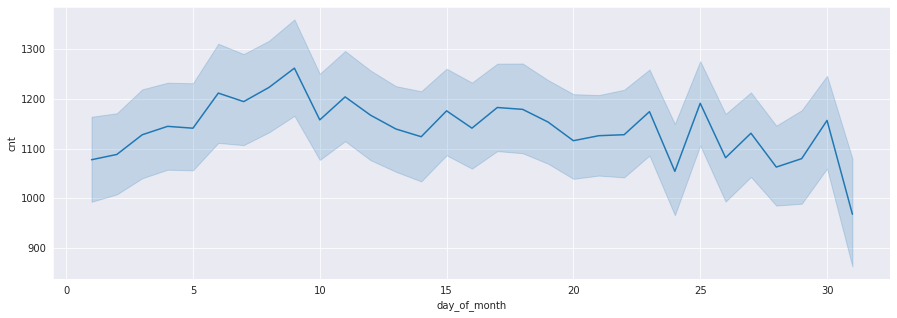

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

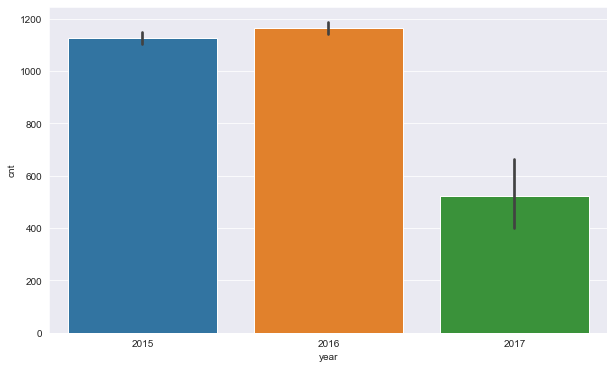

In [37]:
plt.figure(figsize = (10, 6))
sns.barplot(data = df1, x = 'year', y = 'cnt')
plt.show()


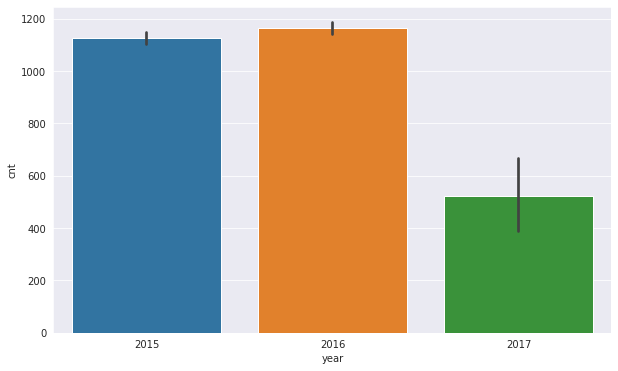

In [11]:
# with barplot


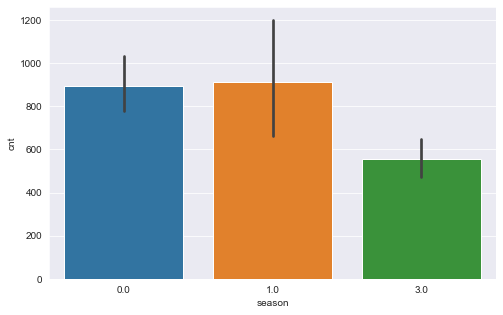

In [38]:
plt.figure(figsize = (8, 5))
sns.barplot(data = df1[df1['is_holiday'] == 1.0], x = 'season', y = 'cnt')
plt.show()


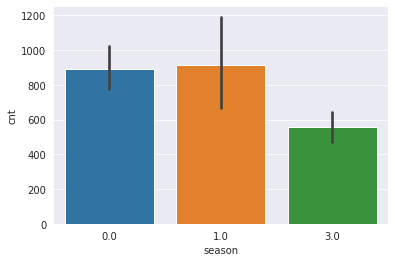

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [39]:
df1.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

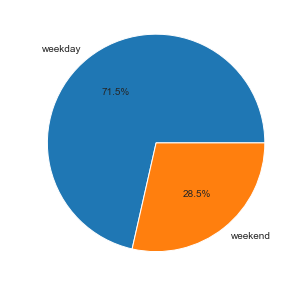

In [40]:
plt.figure(figsize=(5,5))
labels = ['weekday', 'weekend']
df1.is_weekend.value_counts().plot.pie(autopct="%.1f%%", labels=labels);
plt.ylabel(" ");


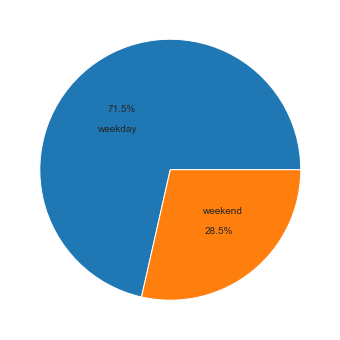

In [250]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(df.is_weekend.value_counts(),
      labels=["weekday","weekend"],
       labeldistance=0.4,
        autopct="%.1f%%"
      );

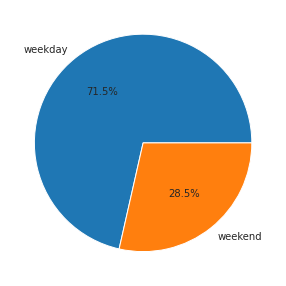

In [ ]:
# pie chart

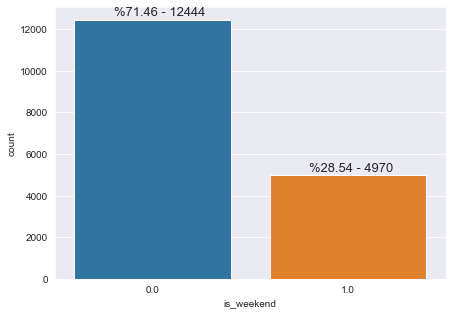

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df1)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df1.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()


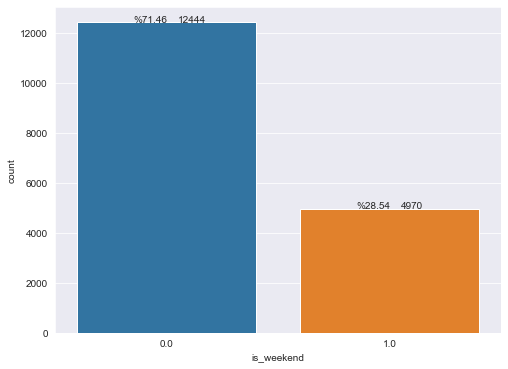

In [255]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x="is_weekend",ax=ax)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()-5));


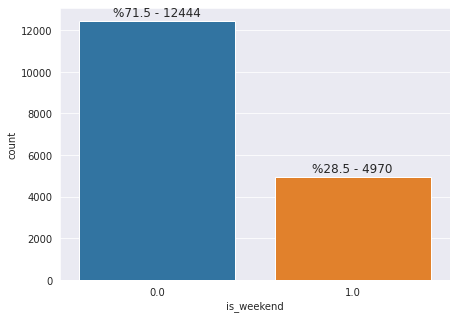

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

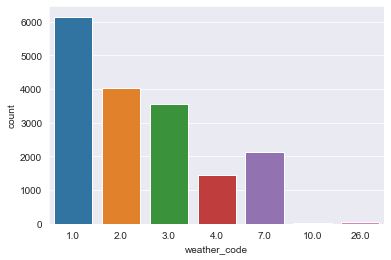

In [42]:
sns.countplot(x="weather_code", data=df);

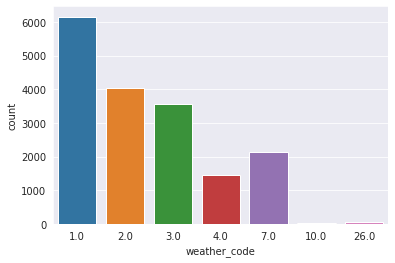

In [ ]:
# with countplot


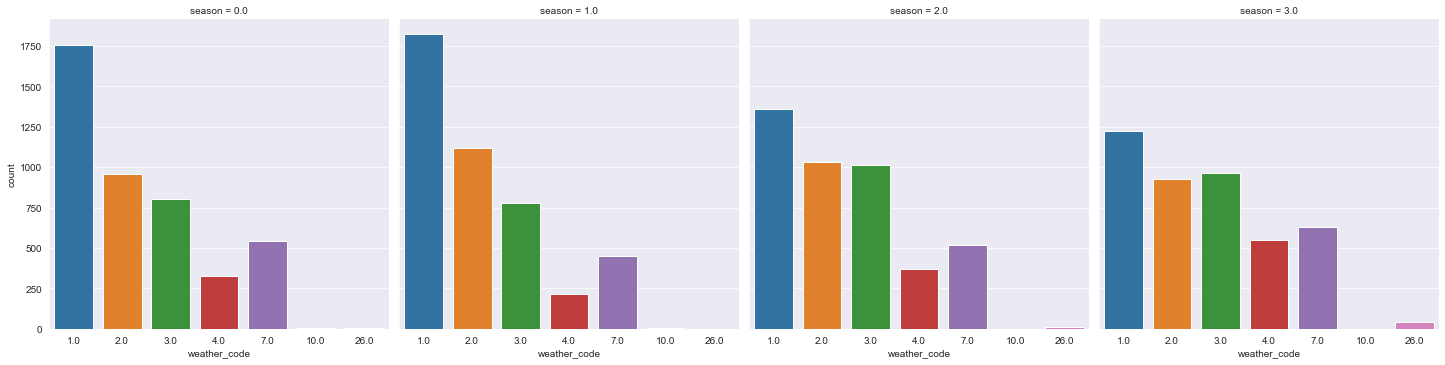

In [43]:
# sns.catplot(kind = "count", data = df1, x = "weather_code", col = "season");
sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df1, kind="count");

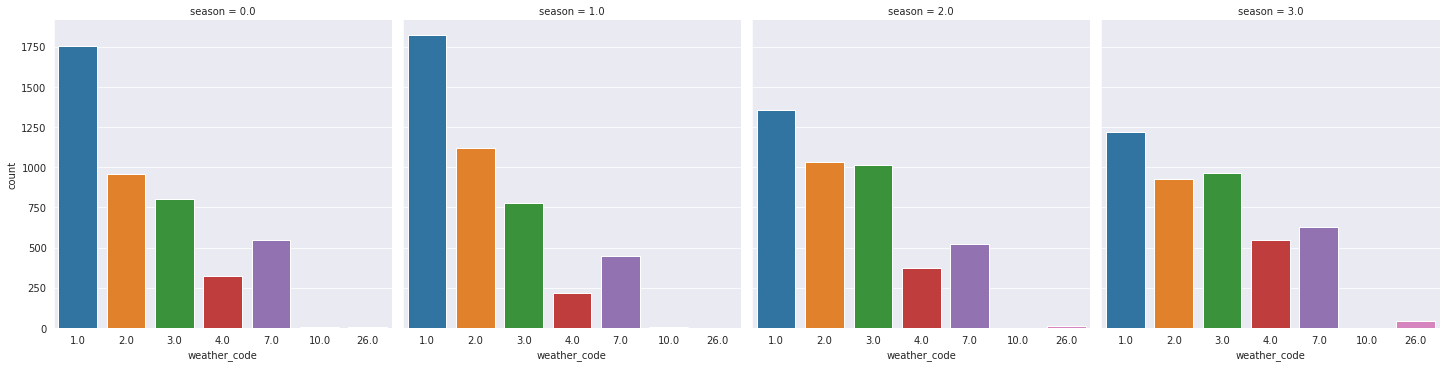

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

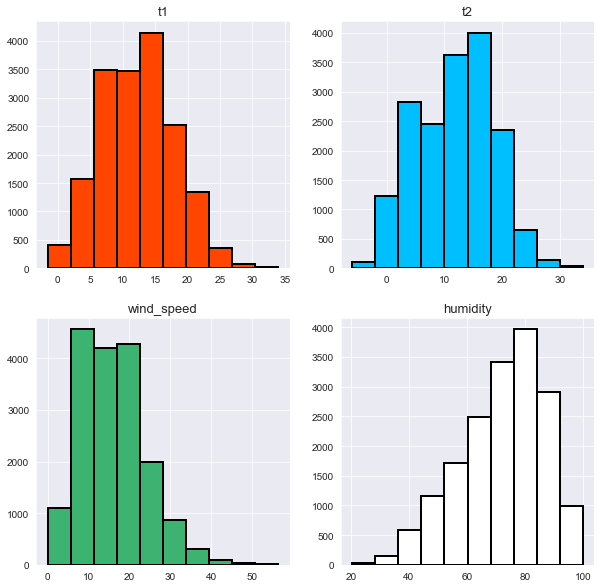

In [44]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)
axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)
plt.show()


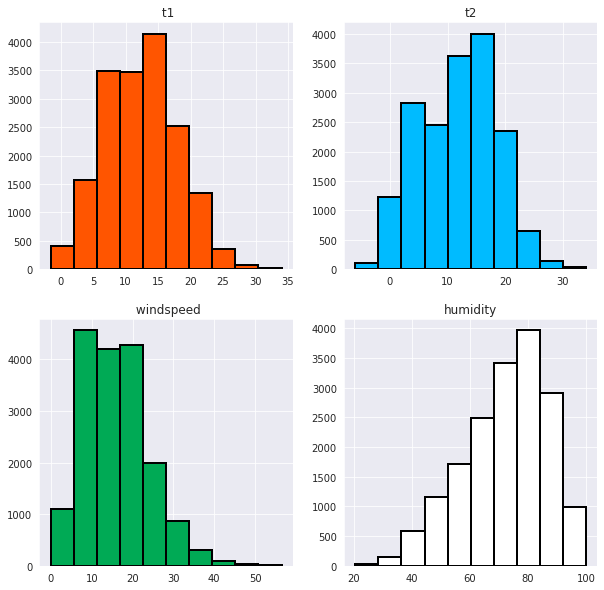

In [ ]:
# matplotlip hist


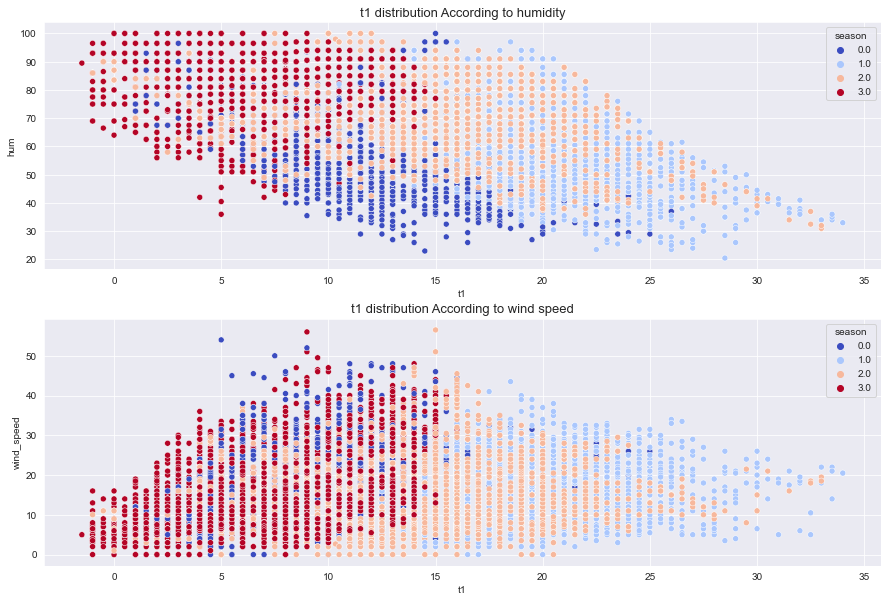

In [45]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data = df1, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df1, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);


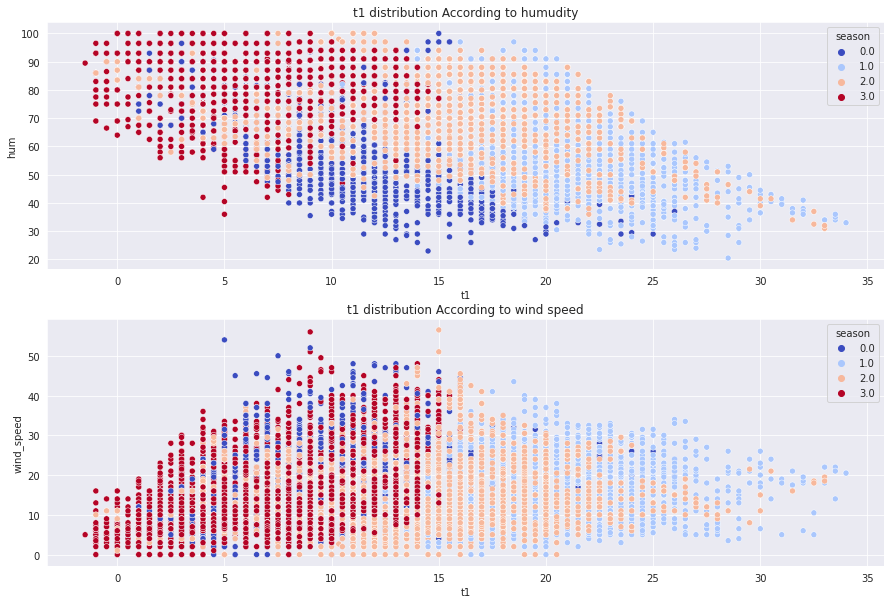

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___